# Example of reading DICOM images from Cloud Object Storage

Jukka Ruponen / IBM, 2019-05-03

### This is just a step by step example, not a best practice!
The method used here will first **download the file from COS** and then **access the file locally on the Notebook**.  

**Reason:**
It seems that S3 (COS) StreamingBody access to DICOM files (which generates a buffered IO-object) will not retain the metadata in the resulting object.  
To get access to full .dcm file, with all it's metadata derived, it seems the way is to download it first and then access it from the underlying file system in the Notebook environment.  
Not exactly the best way with many/large files though but works as an example.  

**Note:**  
If you'd need to process with multiple files from S3 (COS) bucket, there are plenty of examples in the web how to do this.  
Search for instance "boto3 download multiple files" and then change the script below according to your needs.  
**Just stay aware of your available disk space!** Remove downloaded files after being processed.

**Verify the default path in the local file system** (should be /home/dsxuser/work)**:**

In [21]:
local_path = !pwd
local_path[0]

'/home/dsxuser/work'

**Verify contents of the default local path:**

In [4]:
!ls -lh

total 0


**If you need to delete old dcm files from default local path, then uncomment and run this cell:**

In [5]:
#!rm ~/work/*.dcm

**Verify that there is enough available space in the default local path to store downloaded images:**

In [6]:
!df -h ~

Filesystem      Size  Used Avail Use% Mounted on
overlay          99G   27G   67G  29% /


**Set path/filenames for a) COS-file to be downloaded and b) local file to be stored:**

In [23]:
# Source bucket in COS:
cos_bucket = 'jenni-data-bucket'

# Source file path in COS bucket:
cos_filepath = 'LIDC-IDRI/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/000001.dcm'

# Local file to be stored under the default local path:
local_filename = '000001.dcm'

# Display values for verification
print('COS bucket:', cos_bucket)
print('COS filepath:', cos_filepath)
print ("Local file: " + str(local_path[0]) + '/' + str(local_filename))

COS bucket: jenni-data-bucket
COS filepath: LIDC-IDRI/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/000001.dcm
Local file: /home/dsxuser/work/000001.dcm


**CREATE A NEW CELL ON BELOW WITH THE FOLLOWING CONTENT:**  
```python
# @hidden_cell
credentials = {  
    'IBM_API_KEY_ID': 'pXP.............ILi',  
    'IAM_SERVICE_ID': 'ServiceId-a49.............116',  
    'ENDPOINT': 'https://s3.eu-de.cloud-object-storage.appdomain.cloud',  
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-de.bluemix.net/oidc/token',  
    'BUCKET': cos_bucket,  
    'FILE': cos_filepath  
}
```



**EXPLANATION OF HOW TO GET THOSE VALUES:**

- From COS service dashboard, **"Service credentials"** tab, select a key with HMAC keys, then copy/paste:  
**apikey** -> <font color=red>IBM_API_KEY_ID</font>  
**iam_serviceid_crn:serviceid** key value -> <font color=red>IAM_SERVICE_ID</font>  

- From COS service dashboard, **"Endpoint"** tab, select e.g "Regional" and "eu-de" and then copy/paste:  
**Public address value** -> <font color=red>ENDPOINT</font>  

- Leave <font color=red>IBM_AUTH_ENDPOINT</font> value as it is (unless you want to change it from eu-gb auth endpoint)  

**HMAC:** If you don't know how to create COS credentials with HMAC keys, see [here](https://cloud.ibm.com/docs/services/cloud-object-storage/hmac?topic=cloud-object-storage-service-credentials)  




In [17]:
# The code was removed by Watson Studio for sharing.

**Configure and create COS client with the credentials above:**

In [9]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

**Download the file from COS:**

In [11]:
cos.download_file(Bucket=credentials['BUCKET'],Key=cos_filepath,Filename=local_filename)

**Verify the file was downloaded:**

In [12]:
!ls -lh

total 7.9M
-rw-r----- 1 dsxuser dsxuser 7.8M May  3 16:56 000001.dcm


**To install pydicom, uncomment and run the cell below ONLY if you have NOT already done so:**

In [13]:
#!pip install pydicom

**Import pydicom library and read the downloaded DICOM file:**

In [14]:
import pydicom
ds = pydicom.dcmread(local_filename)

**Plot the DICOM image:**

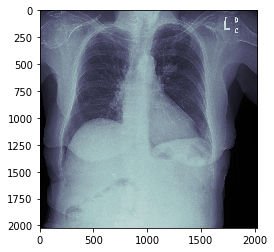

In [16]:
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 